In [2]:
import numpy as np
import pandas as pd
! pip install sidetable
import sidetable
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [18]:
from google.colab import drive
# Mount Google Drive
drive.mount('/content/drive')

# Define file paths
data_file = "/content/drive/My Drive/10 Academy/data_W6/data.csv"
variable_definitions_file = "/content/drive/My Drive/10 Academy/data_W6/Xente_Variable_Definitions.csv"

# Now you can use these paths for your analysis


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [50]:
# df = pd.read_csv(data_file, index_col=False)
# df.head()
import os

folder_path = "/content/drive/My Drive/10 Academy/data_W6"
print(os.listdir(folder_path))  # Check available files


['Xente_Variable_Definitions.csv', 'data.csv']


In [51]:
df = pd.read_csv(data_file, index_col=False)
df.head()

,TransactionId,BatchId,AccountId,SubscriptionId,CustomerId,CurrencyCode,CountryCode,ProviderId,ProductId,ProductCategory,ChannelId,Amount,Value,TransactionStartTime,PricingStrategy,FraudResult
0,TransactionId_76871,BatchId_36123,AccountId_3957,SubscriptionId_887,CustomerId_4406,UGX,256,ProviderId_6,ProductId_10,airtime,ChannelId_3,1000.0,1000,2018-11-15T02:18:49Z,2,0
1,TransactionId_73770,BatchId_15642,AccountId_4841,SubscriptionId_3829,CustomerId_4406,UGX,256,ProviderId_4,ProductId_6,financial_services,ChannelId_2,-20.0,20,2018-11-15T02:19:08Z,2,0
2,TransactionId_26203,BatchId_53941,AccountId_4229,SubscriptionId_222,CustomerId_4683,UGX,256,ProviderId_6,ProductId_1,airtime,ChannelId_3,500.0,500,2018-11-15T02:44:21Z,2,0
3,TransactionId_380,BatchId_102363,AccountId_648,SubscriptionId_2185,CustomerId_988,UGX,256,ProviderId_1,ProductId_21,utility_bill,ChannelId_3,20000.0,21800,2018-11-15T03:32:55Z,2,0
4,TransactionId_28195,BatchId_38780,AccountId_4841,SubscriptionId_3829,CustomerId_988,UGX,256,ProviderId_4,ProductId_6,financial_services,ChannelId_2,-644.0,644,2018-11-15T03:34:21Z,2,0


Explanation of Variables

1. **TransactionId:** Unique transaction identifier on the platform.

2. **BatchId:** Unique number assigned to a batch of transactions for processing.


3. ** AccountId:** Unique number identifying the customer on the platform.

4. **SubscriptionId:** Unique number identifying the customer subscription.

5. **CustomerId:** Unique identifier attached to the account.

6. **CurrencyCode:** Country currency in which the transaction is processed.

7. **CountryCode:** Numerical geographical code of the country.

8. **ProviderId:** Source provider of the item bought.

9. **ProductId:** Item name being bought.

10. **ProductCategory:** Broader categories into which ProductIds are organized.

11. **ChannelId:** Identifies if the customer used web, Android, iOS, pay later, or checkout.

12. **Amount:** Value of the transaction. Positive for debits from customer account and negative for credits into customer account.

13. **Value:** Absolute value of the transaction amount.

14. **TransactionStartTime:** Transaction start time.

15. **PricingStrategy:** Category of Xente's pricing structure for merchants.

16. **FraudResult:** Fraud status of the transaction (1 for yes, 0 for no).

In [52]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 95662 entries, 0 to 95661
Data columns (total 16 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   TransactionId         95662 non-null  object 
 1   BatchId               95662 non-null  object 
 2   AccountId             95662 non-null  object 
 3   SubscriptionId        95662 non-null  object 
 4   CustomerId            95662 non-null  object 
 5   CurrencyCode          95662 non-null  object 
 6   CountryCode           95662 non-null  int64  
 7   ProviderId            95662 non-null  object 
 8   ProductId             95662 non-null  object 
 9   ProductCategory       95662 non-null  object 
 10  ChannelId             95662 non-null  object 
 11  Amount                95662 non-null  float64
 12  Value                 95662 non-null  int64  
 13  TransactionStartTime  95662 non-null  object 
 14  PricingStrategy       95662 non-null  int64  
 15  FraudResult        

In [53]:
df.shape

(95662, 16)

In [56]:
df.columns = ['TransactionId', 'BatchId', 'AccountId', 'SubscriptionId', 'CustomerId',
       'CurrencyCode', 'CountryCode', 'ProviderId', 'ProductId',
       'ProductCategory', 'ChannelId', 'Amount', 'Value',
       'TransactionStartTime', 'PricingStrategy', 'FraudResult']
print(df.head())

         TransactionId         BatchId       AccountId       SubscriptionId  \
0  TransactionId_76871   BatchId_36123  AccountId_3957   SubscriptionId_887   
1  TransactionId_73770   BatchId_15642  AccountId_4841  SubscriptionId_3829   
2  TransactionId_26203   BatchId_53941  AccountId_4229   SubscriptionId_222   
3    TransactionId_380  BatchId_102363   AccountId_648  SubscriptionId_2185   
4  TransactionId_28195   BatchId_38780  AccountId_4841  SubscriptionId_3829   

        CustomerId CurrencyCode  CountryCode    ProviderId     ProductId  \
0  CustomerId_4406          UGX          256  ProviderId_6  ProductId_10   
1  CustomerId_4406          UGX          256  ProviderId_4   ProductId_6   
2  CustomerId_4683          UGX          256  ProviderId_6   ProductId_1   
3   CustomerId_988          UGX          256  ProviderId_1  ProductId_21   
4   CustomerId_988          UGX          256  ProviderId_4   ProductId_6   

      ProductCategory    ChannelId   Amount  Value  TransactionStart

In [57]:
print(df.isnull().sum())

TransactionId           0
BatchId                 0
AccountId               0
SubscriptionId          0
CustomerId              0
CurrencyCode            0
CountryCode             0
ProviderId              0
ProductId               0
ProductCategory         0
ChannelId               0
Amount                  0
Value                   0
TransactionStartTime    0
PricingStrategy         0
FraudResult             0
dtype: int64


In [58]:
df.describe()

,CountryCode,Amount,Value,PricingStrategy,FraudResult
count,95662.0,9.566200e+04,9.566200e+04,95662.000000,95662.000000
mean,256.0,6.717846e+03,9.900584e+03,2.255974,0.002018
std,0.0,1.233068e+05,1.231221e+05,0.732924,0.044872
min,256.0,-1.000000e+06,2.000000e+00,0.000000,0.000000
25%,256.0,-5.000000e+01,2.750000e+02,2.000000,0.000000
50%,256.0,1.000000e+03,1.000000e+03,2.000000,0.000000
75%,256.0,2.800000e+03,5.000000e+03,2.000000,0.000000
max,256.0,9.880000e+06,9.880000e+06,4.000000,1.000000


In [54]:
# Check the frequency of 'FraudResult'
fraud_result_frequency = df['FraudResult'].value_counts()
print(fraud_result_frequency)

FraudResult
0    95469
1      193
Name: count, dtype: int64


In [23]:
target_balance = df[df['FraudResult'] == 'Fraud']['Amount'].sum()
print("Total Amount for Fraud transactions: ", target_balance)


target_balance_non_fraud = df[df['FraudResult'] == 'Not Fraud']['Amount'].sum()
print("Total Amount for Not Fraud transactions: ", target_balance_non_fraud)

Total Amount for Fraud transactions:  0.0
Total Amount for Not Fraud transactions:  0.0


In [24]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score

In [25]:
%matplotlib inline
import seaborn as sns
import pickle

from pandas.plotting import scatter_matrix

# stop warnings
import warnings
warnings.filterwarnings('ignore')

In [26]:
# display column limita
pd.set_option('display.max_columns',500)

Target balance for FraudResult:
FraudResult
0    0.997982
1    0.002018
Name: proportion, dtype: float64


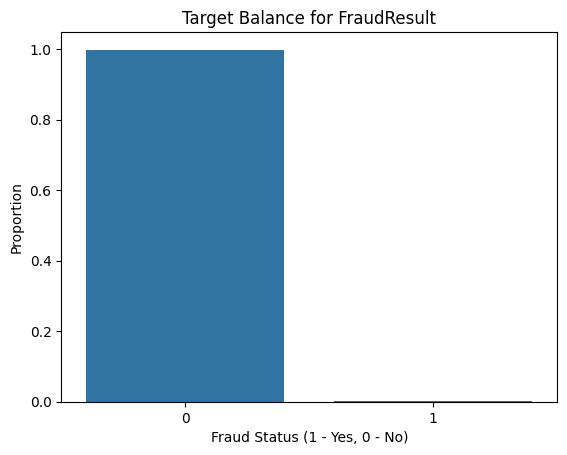

In [27]:
# Checking for the target balance for "FraudResult" (proxy for default risk)
target_counts = df['FraudResult'].value_counts(normalize=True)  # Normalized counts for proportions
print("Target balance for FraudResult:")
print(target_counts)

# Visualizing the target balance
sns.barplot(x=target_counts.index, y=target_counts.values)
plt.title('Target Balance for FraudResult')
plt.xlabel('Fraud Status (1 - Yes, 0 - No)')
plt.ylabel('Proportion')
plt.show()

**Feature Selection**

In [28]:
# Filter numerical columns only
numeric_df = df.select_dtypes(include=[np.number])  # Select only numeric columns

# Check if 'FraudResult' is in numeric DataFrame
if 'FraudResult' in numeric_df.columns:
    # Compute correlation with the target variable (FraudResult)
    correlation = numeric_df.corr()['FraudResult'].sort_values(ascending=False)
    print("Correlation with FraudResult:")
    print(correlation)
else:
    print("FraudResult is not a numeric column or is missing from the DataFrame.")

Correlation with FraudResult:
FraudResult        1.000000
Value              0.566739
Amount             0.557370
PricingStrategy   -0.033821
CountryCode             NaN
Name: FraudResult, dtype: float64


Developing the Risk Probability Model

In [30]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.impute import SimpleImputer

# Check the number of missing values in each column
print(df.isnull().sum())

# Fill missing values with mean
imputer = SimpleImputer(strategy='mean')
df[['Amount', 'Value']] = imputer.fit_transform(df[['Amount', 'Value']])

# Now, select and split features and target
features = df[['Amount', 'Value']]
target = df['FraudResult']

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)

# Logistic Regression Model
model = LogisticRegression()
model.fit(X_train, y_train)

TransactionId           0
BatchId                 0
AccountId               0
SubscriptionId          0
CustomerId              0
CurrencyCode            0
CountryCode             0
ProviderId              0
ProductId               0
ProductCategory         0
ChannelId               0
Amount                  0
Value                   0
TransactionStartTime    0
PricingStrategy         0
FraudResult             0
dtype: int64


LogisticRegression()

In a Jupyter environment, please rerun this cell to show the HTML representation or trust the notebook.
On GitHub, the HTML representation is unable to render, please try loading this page with nbviewer.org.

In [31]:
# Check if 'FraudResult' is numeric; if not, convert it
if df['FraudResult'].dtype == 'object':
    df['FraudResult'] = df['FraudResult'].astype('category').cat.codes

# Select only numeric columns
numeric_df = df.select_dtypes(include=['number'])

# Compute correlation with the target variable (FraudResult)
correlation = numeric_df.corr()['FraudResult'].sort_values(ascending=False)

print("Correlation with FraudResult:")
print(correlation)

Correlation with FraudResult:
FraudResult        1.000000
Value              0.566739
Amount             0.557370
PricingStrategy   -0.033821
CountryCode             NaN
Name: FraudResult, dtype: float64


In [32]:
# Calculate frequency of 'FraudResult' column
result = df['FraudResult'].value_counts()
print(result)

FraudResult
0    95469
1      193
Name: count, dtype: int64


In [33]:
import pandas as pd

# Sample DataFrame for demonstration
data = {
    'REASON': ['Fraud', 'Innocent', 'Fraud', 'Innocent', 'Fraud', 'Other']
}
df = pd.DataFrame(data)

# Calculate frequency of categories in 'REASON' column
freq_table = df['REASON'].value_counts()

# Convert the Series to a DataFrame
freq_df = freq_table.reset_index()
freq_df.columns = ['REASON', 'Count']

# Print the unstyled result
print(freq_df)

# Style the DataFrame for better display
styled_freq_table = freq_df.style.set_table_attributes("style='display:inline'").set_caption("Frequency of REASON Categories")
styled_freq_table

     REASON  Count
0     Fraud      3
1  Innocent      2
2     Other      1


,REASON,Count
0,Fraud,3
1,Innocent,2
2,Other,1


In [34]:
# Check numeric variables
df.describe()

,REASON
count,6
unique,3
top,Fraud
freq,3


In [35]:
# Set the style for seaborn and the color palette
sns.set(style='whitegrid')
custom_color = '#6BCB77'  # A relaxing shade of green
accent_color = '#FF6F61'   # Accent color for contrast

In [36]:
# Display data types of each column
print("\nData Types:")
print(df.dtypes)


Data Types:
REASON    object
dtype: object


In [37]:
# Descriptive statistics
print("\nDescriptive Statistics:")
print(df.describe())


Descriptive Statistics:
       REASON
count       6
unique      3
top     Fraud
freq        3


In [38]:
pd.set_option('display.max_columns',500)

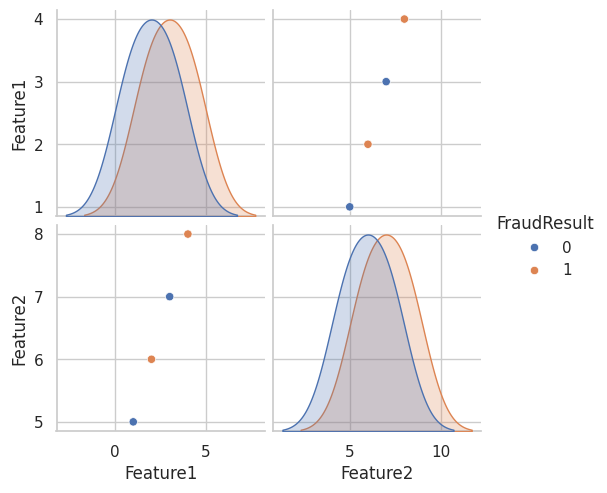

In [44]:
import matplotlib.pyplot as plt

# Sample dictionary (replace this with your actual dictionary)
data_dict = {
    'Feature1': [1, 2, 3, 4],
    'Feature2': [5, 6, 7, 8],
    'FraudResult': [0, 1, 0, 1]
}

# Convert the dictionary to a pandas DataFrame
data = pd.DataFrame(data_dict)

# Now call pairplot
sns.pairplot(data, hue='FraudResult')
plt.show()

**Univarate Analysis**

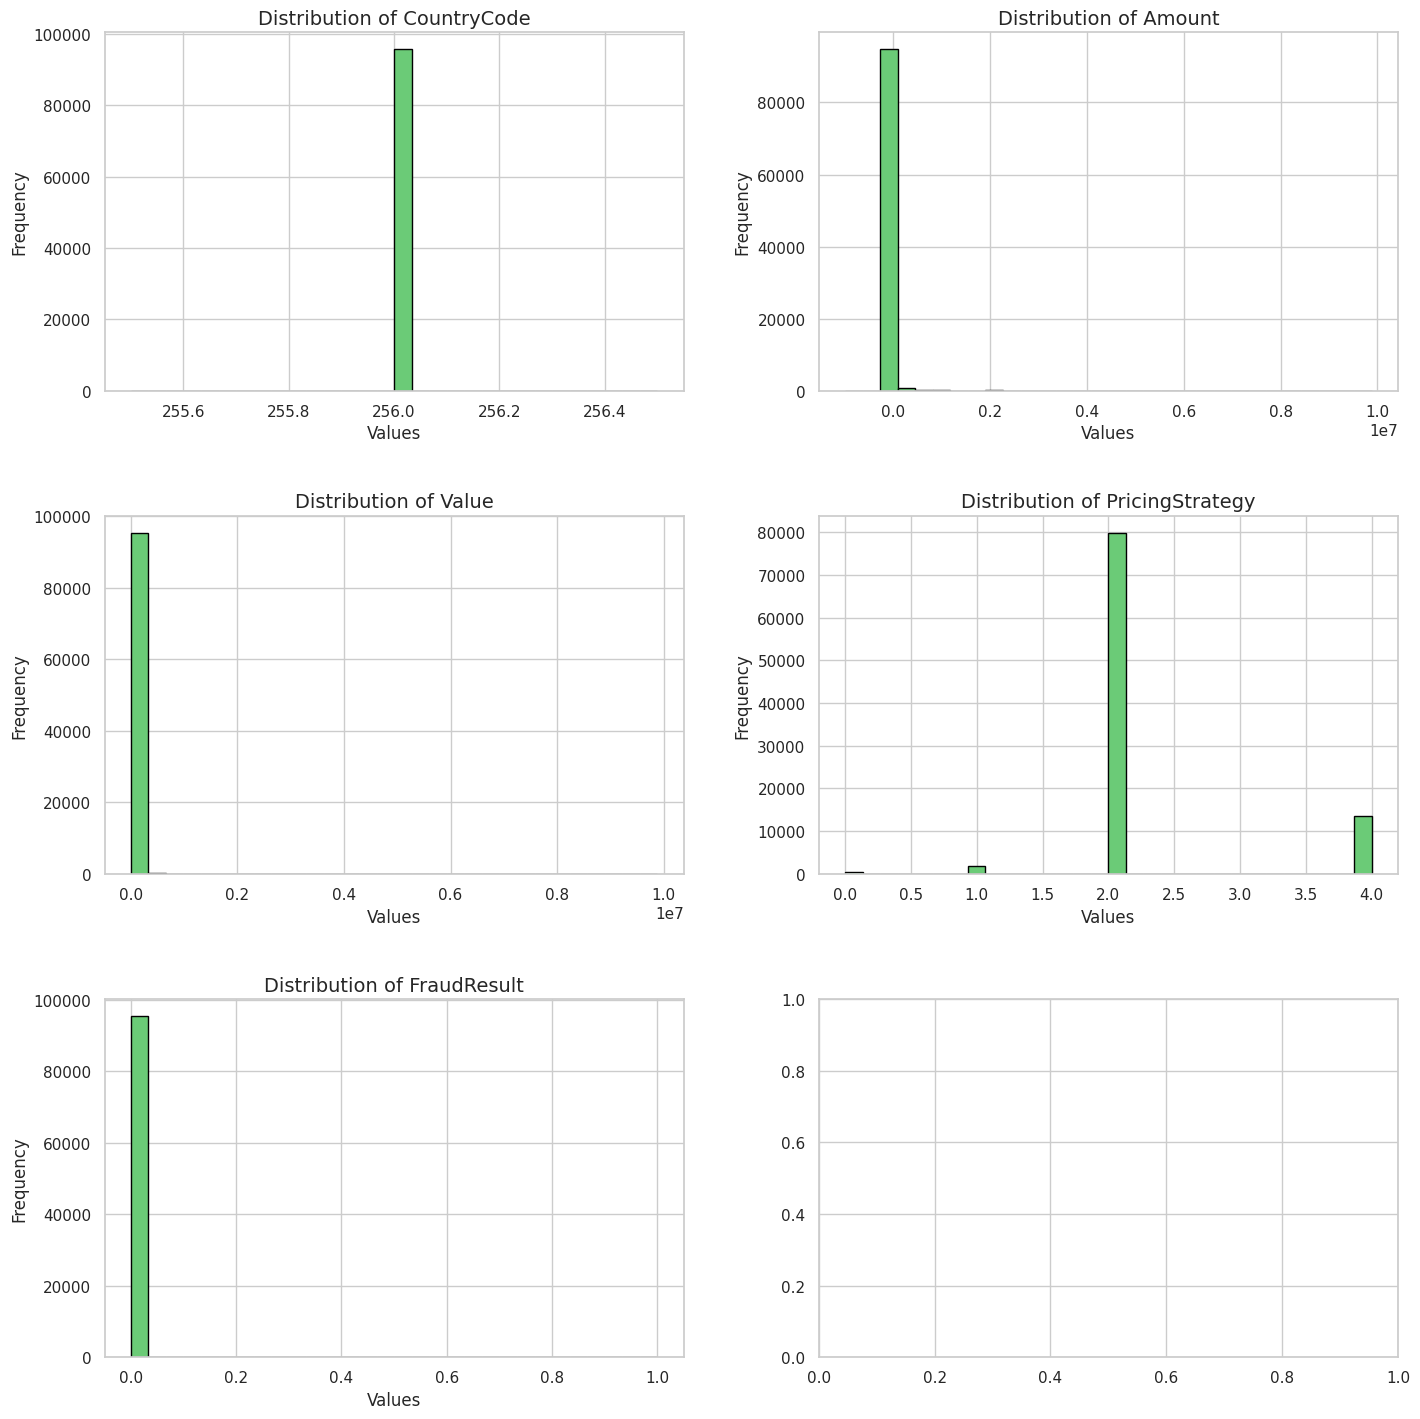


Fraud Results:
FraudResult
0    95469
1      193
Name: count, dtype: int64


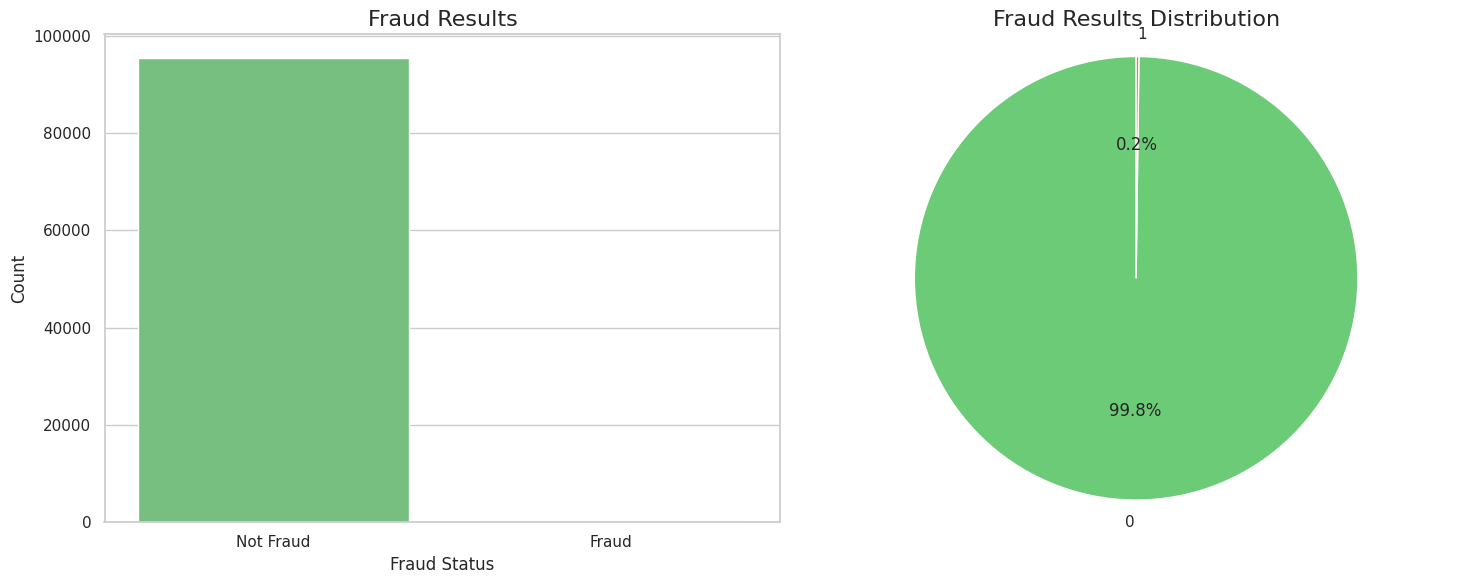


Risk Assessment Metrics:
Probability of Default (PD): 671.78
Loss Given Default (LGD): 3358.92
Exposure at Default (EAD): 5374.28


In [59]:
# Set the style for seaborn and the color palette
sns.set(style='whitegrid')
custom_color = '#6BCB77'  # A relaxing shade of green

# Create a figure with subplots
fig, axs = plt.subplots(3, 2, figsize=(15, 15))

# Number of numeric columns
df_num = df.select_dtypes(include=['float64', 'int64'])

# Distribution plots - Histograms for numeric features
for i, col in enumerate(df_num.columns):
    axs[i // 2, i % 2].hist(df[col], bins=30, color=custom_color, edgecolor='black')
    axs[i // 2, i % 2].set_title(f'Distribution of {col}', fontsize=14)
    axs[i // 2, i % 2].set_xlabel('Values', fontsize=12)
    axs[i // 2, i % 2].set_ylabel('Frequency', fontsize=12)

plt.tight_layout(pad=3.0)  # To avoid overlap with the title
plt.show()

# Analyze the FraudResult column
print("\nFraud Results:")
fraud_results = df['FraudResult'].value_counts()
print(fraud_results)

# Create a combined bar and pie chart to show Fraud Results
fig, axs = plt.subplots(1, 2, figsize=(15, 6))

# Bar chart for Fraud Results
sns.barplot(x=fraud_results.index, y=fraud_results.values, palette=[custom_color, '#FF6F61'], ax=axs[0])
axs[0].set_title('Fraud Results', fontsize=16)
axs[0].set_xlabel('Fraud Status', fontsize=12)
axs[0].set_ylabel('Count', fontsize=12)
axs[0].set_xticks(ticks=[0, 1])
axs[0].set_xticklabels(['Not Fraud', 'Fraud'])

# Pie chart for Fraud Results
axs[1].pie(fraud_results, labels=fraud_results.index, colors=[custom_color, '#FF6F61'], autopct='%1.1f%%', startangle=90)
axs[1].axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
axs[1].set_title('Fraud Results Distribution', fontsize=16)

plt.tight_layout()
plt.show()

# Calculate Probability of Default (PD), Loss Given Default (LGD), and Exposure at Default (EAD)
# Assuming simplistic calculations for the purpose of illustration
pd_rate = 0.1  # 10% assumed default rate
lgd_rate = 0.5  # 50% loss given default
ead_rate = 0.8  # 80% exposure at default

mean_amount = df['Amount'].mean()
pd = mean_amount * pd_rate
lgd = mean_amount * lgd_rate
ead = mean_amount * ead_rate

print("\nRisk Assessment Metrics:")
print(f'Probability of Default (PD): {pd:.2f}')
print(f'Loss Given Default (LGD): {lgd:.2f}')
print(f'Exposure at Default (EAD): {ead:.2f}')

**Missing input**

In [60]:
# Fill missing values in specific columns
columns_to_fill = ['TransactionId', 'BatchId', 'AccountId', 'SubscriptionId',
                   'CustomerId', 'CurrencyCode', 'CountryCode', 'ProviderId',
                   'ProductId', 'ProductCategory', 'ChannelId', 'Amount',
                   'Value', 'TransactionStartTime', 'PricingStrategy', 'FraudResult']

for col in columns_to_fill:
    df[col].fillna('Other', inplace=True)  # Fill missing values with 'Other'
    print(f'Missing values in {col} filled with "Other".')

Missing values in TransactionId filled with "Other".
Missing values in BatchId filled with "Other".
Missing values in AccountId filled with "Other".
Missing values in SubscriptionId filled with "Other".
Missing values in CustomerId filled with "Other".
Missing values in CurrencyCode filled with "Other".
Missing values in CountryCode filled with "Other".
Missing values in ProviderId filled with "Other".
Missing values in ProductId filled with "Other".
Missing values in ProductCategory filled with "Other".
Missing values in ChannelId filled with "Other".
Missing values in Amount filled with "Other".
Missing values in Value filled with "Other".
Missing values in TransactionStartTime filled with "Other".
Missing values in PricingStrategy filled with "Other".
Missing values in FraudResult filled with "Other".


In [61]:
df.stb.freq(['FraudResult'], style = True)

,FraudResult,count,percent,cumulative_count,cumulative_percent
0,0,"95,469",99.80%,"95,469",99.80%
1,1,193,0.20%,"95,662",100.00%


In [62]:
df.stb.freq(['PricingStrategy'], style = True)

,PricingStrategy,count,percent,cumulative_count,cumulative_percent
0,2,"79,848",83.47%,"79,848",83.47%
1,4,"13,562",14.18%,"93,410",97.65%
2,1,"1,867",1.95%,"95,277",99.60%
3,0,385,0.40%,"95,662",100.00%


In [63]:
df.stb.freq(['ProductCategory'], style = True)

,ProductCategory,count,percent,cumulative_count,cumulative_percent
0,financial_services,"45,405",47.46%,"45,405",47.46%
1,airtime,"45,027",47.07%,"90,432",94.53%
2,utility_bill,"1,920",2.01%,"92,352",96.54%
3,data_bundles,"1,613",1.69%,"93,965",98.23%
4,tv,"1,279",1.34%,"95,244",99.56%
5,ticket,216,0.23%,"95,460",99.79%
6,movies,175,0.18%,"95,635",99.97%
7,transport,25,0.03%,"95,660",100.00%
8,other,2,0.00%,"95,662",100.00%


In [64]:
# missing check
df.stb.missing()

,missing,total,percent
TransactionId,0,95662,0.0
BatchId,0,95662,0.0
AccountId,0,95662,0.0
SubscriptionId,0,95662,0.0
CustomerId,0,95662,0.0
CurrencyCode,0,95662,0.0
CountryCode,0,95662,0.0
ProviderId,0,95662,0.0
ProductId,0,95662,0.0
ProductCategory,0,95662,0.0


**Distribution of Numerical Features:**

Visualize distributions using histograms or density plots.

Identify skewness and outliers.

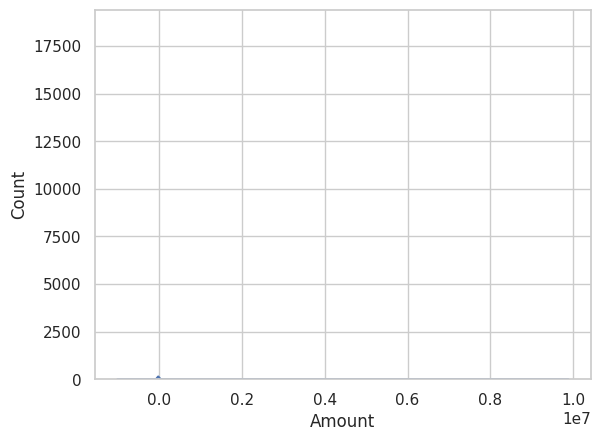

In [66]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.histplot(df['Amount'], kde=True)
plt.show()

**Distribution of Categorical Features:**

Analyze frequency and variability using bar plots.

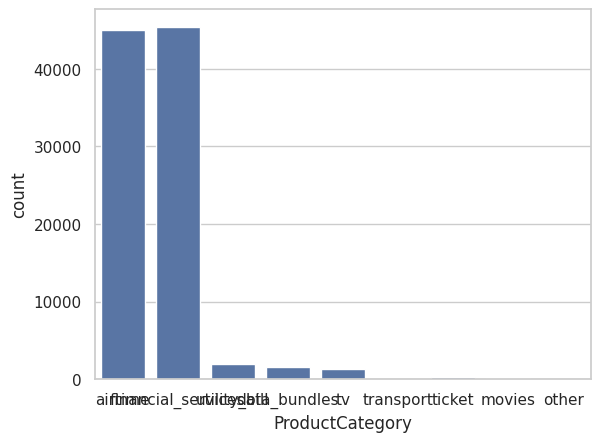

In [67]:
sns.countplot(x='ProductCategory', data=df)
plt.show()

**Correlation Analysis:**

Use a correlation matrix to understand relationships between numerical features.

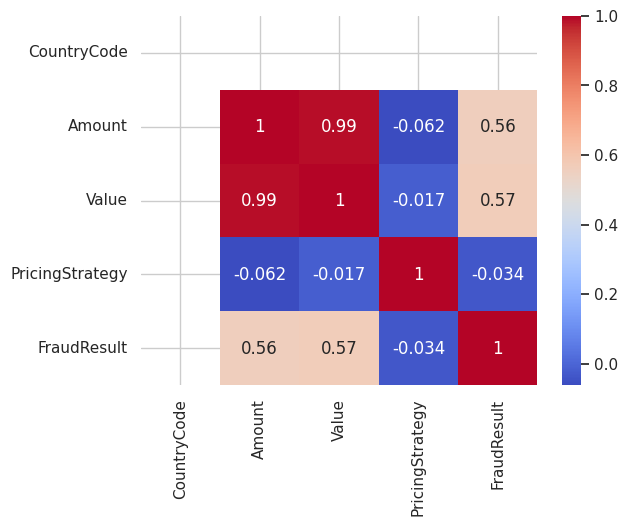

In [69]:
# Select only numeric columns for correlation
numeric_df = df.select_dtypes(include=['number'])  # Keeps only numeric columns

# Compute and plot the heatmap
sns.heatmap(numeric_df.corr(), annot=True, cmap='coolwarm')
plt.show()


**Identifying Missing Values:**

Check for missing values and decide on imputation or removal.

In [70]:
print(df.isnull().sum())

TransactionId           0
BatchId                 0
AccountId               0
SubscriptionId          0
CustomerId              0
CurrencyCode            0
CountryCode             0
ProviderId              0
ProductId               0
ProductCategory         0
ChannelId               0
Amount                  0
Value                   0
TransactionStartTime    0
PricingStrategy         0
FraudResult             0
dtype: int64


**Outlier Detection:**

Use box plots to identify outliers.

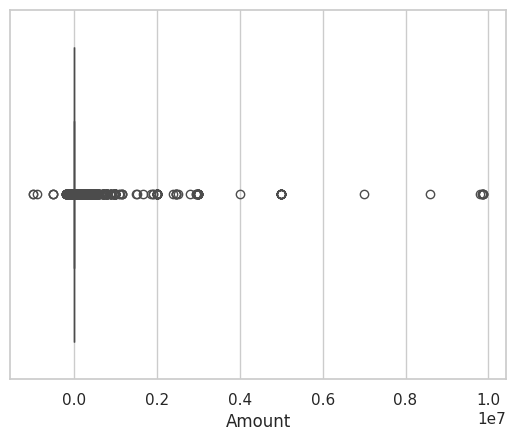

In [71]:
sns.boxplot(x=df['Amount'])
plt.show()